### Преобразование Фурье

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def processed_fourier(img):
    
    #Преобразование Фурье
    fft2 = np.fft.fft2(img)
    plt.figure(figsize=(10,10))
    plt.imshow(np.abs(fft2),'gray')
    plt.title('fft2')
    
    #Перемещение исходной точки преобразования изображения в центр прямоугольника частотной области.
    center = np.fft.fftshift(fft2)
    plt.figure(figsize=(10,10))
    plt.imshow(np.abs(center),'gray')
    plt.title('center')
    
    #Логарифмическое преобразование результата преобразования Фурье.
    log_fft2 = np.log(1 + np.abs(fft2))
    plt.figure(figsize=(10,10))
    plt.imshow(log_fft2,'gray')
    plt.title('log_fft2')
    
    #Логарифмическое преобразование централизованного результата.
    log_center = np.log(1 + np.abs(center))
    plt.figure(figsize=(10,10))
    plt.imshow(log_center,'gray')
    plt.title('log_center')

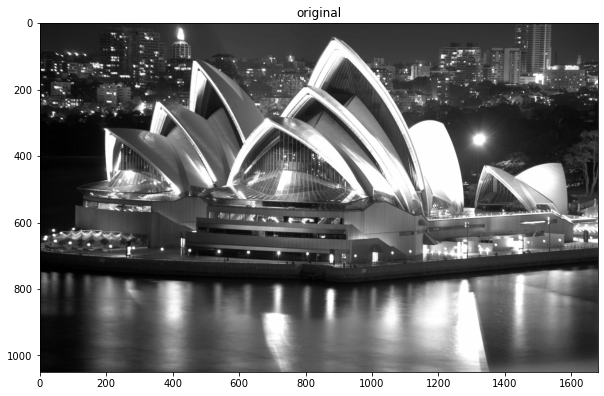

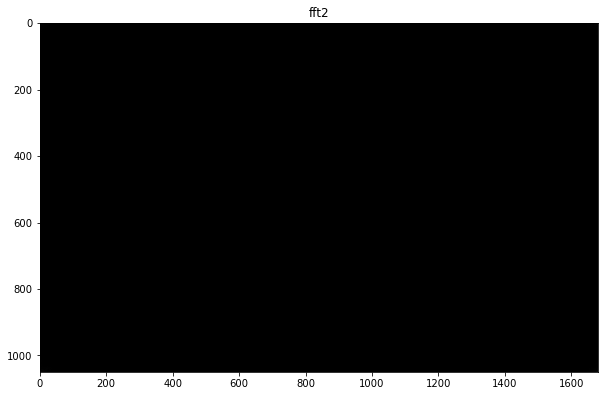

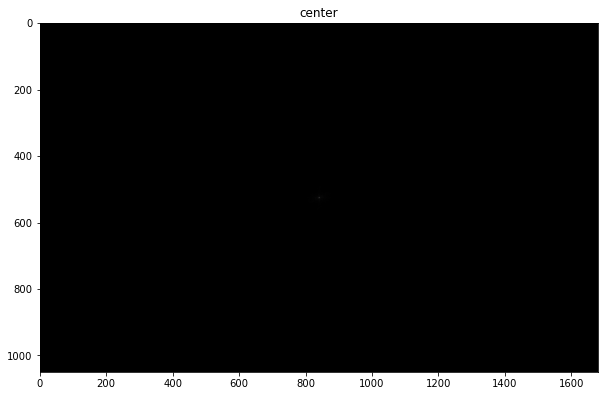

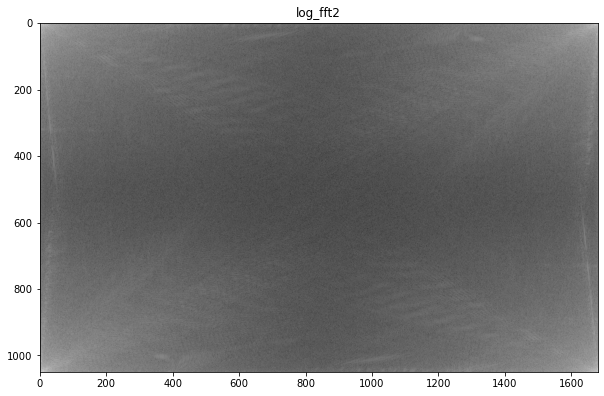

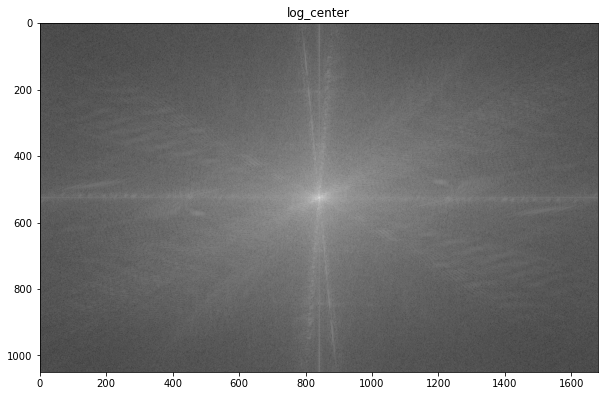

In [37]:
img = plt.imread('1.jpg')
img = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2]
plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')
plt.title('original')
processed_fourier(img)

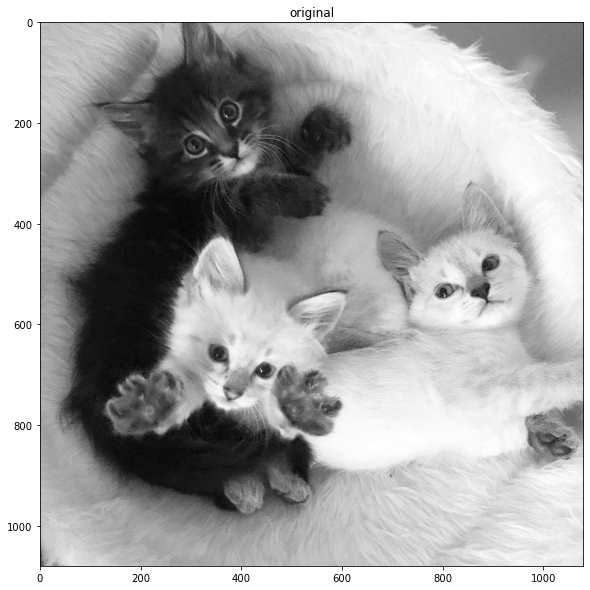

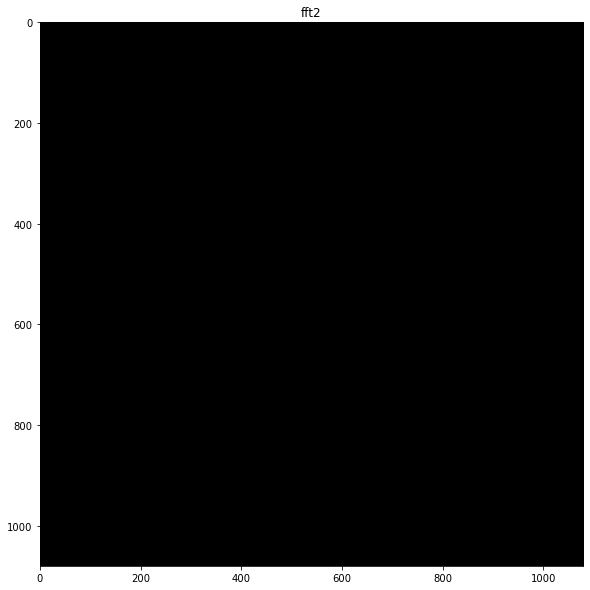

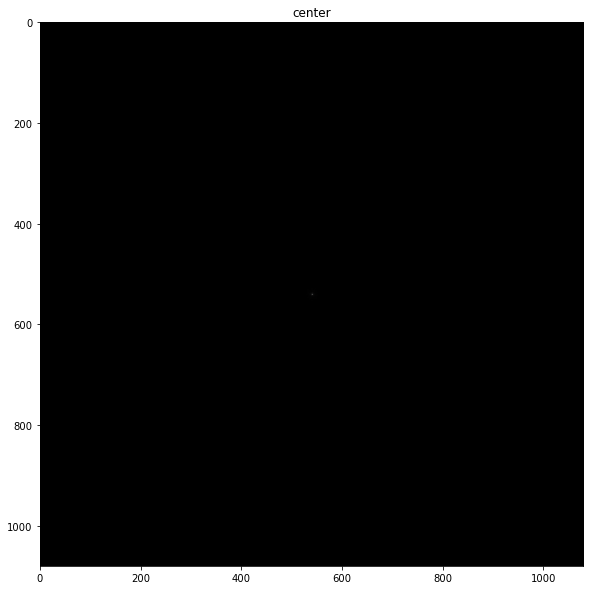

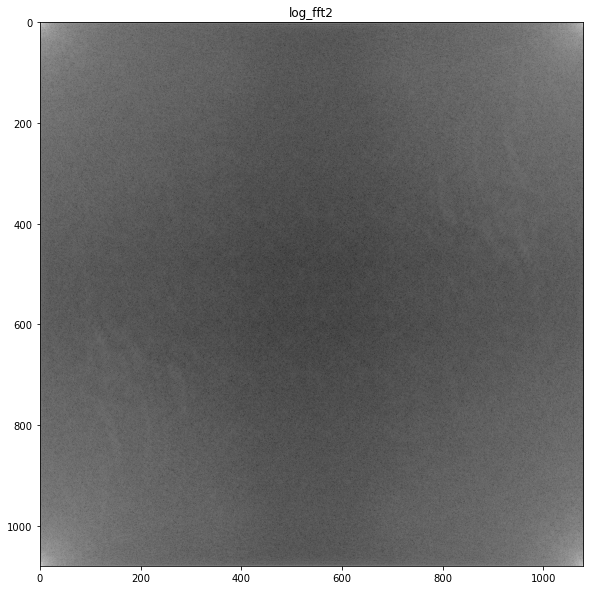

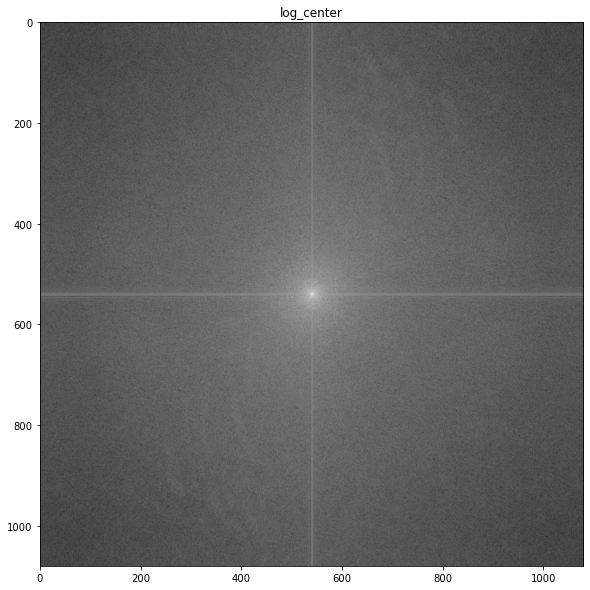

In [38]:
img2 = plt.imread('2.jpg')
img2 = 0.2126 * img2[:,:,0] + 0.7152 * img2[:,:,1] + 0.0722 * img2[:,:,2]
plt.figure(figsize=(10,10))
plt.imshow(img2, 'gray')
plt.title('original')
processed_fourier(img2)

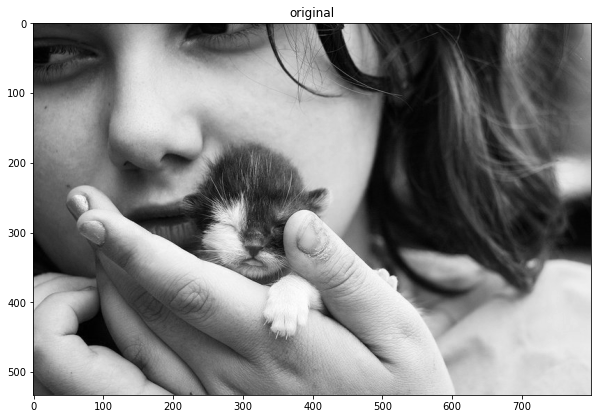

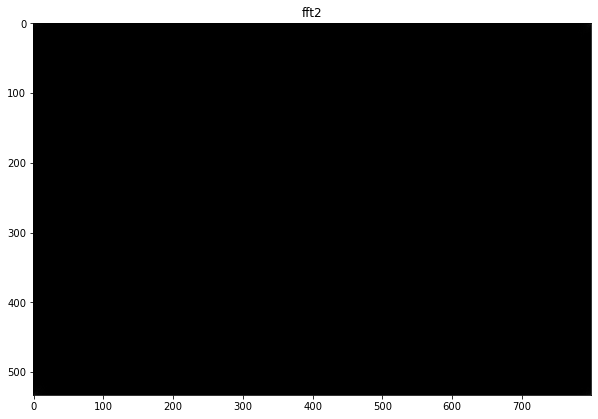

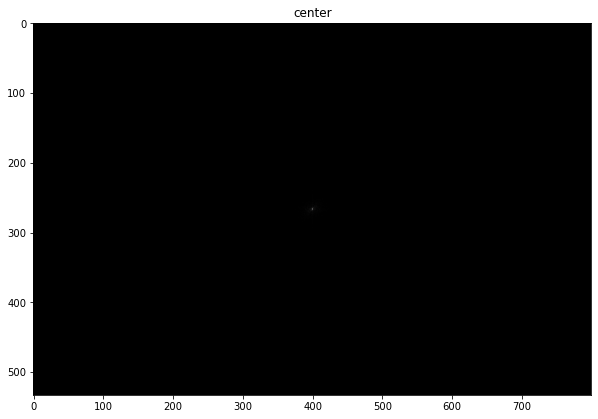

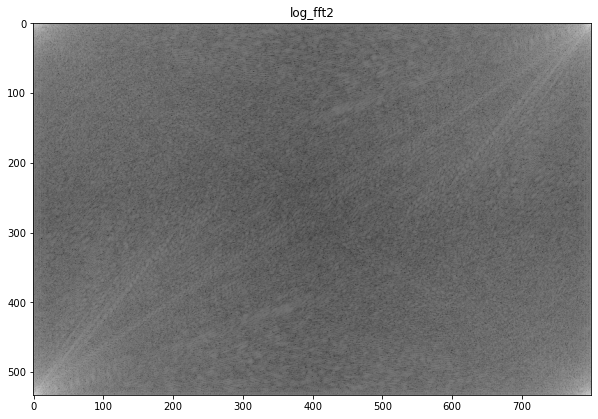

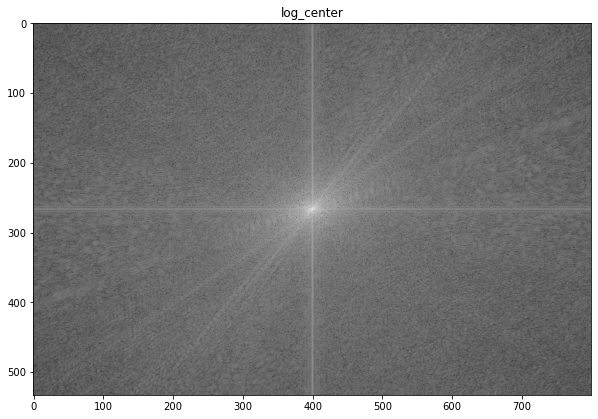

In [39]:
img3 = plt.imread('3.jpg')
img3 = 0.2126 * img3[:,:,0] + 0.7152 * img3[:,:,1] + 0.0722 * img3[:,:,2]
plt.figure(figsize=(10,10))
plt.imshow(img3, 'gray')
plt.title('original')
processed_fourier(img3)

### Теорема о свёртке

In [40]:
from skimage.io import imread, imshow
import scipy.fftpack as fp
import numpy as np
from scipy.signal.windows import gaussian

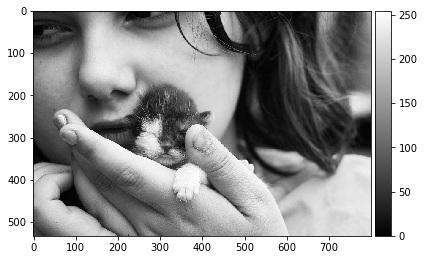

In [41]:
img = imread('3.jpg')
img = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2]
imshow(img, cmap='gray')

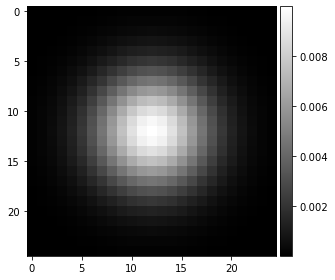

In [42]:
sigma = 4
n_points = 2 * round(sigma * 3) + 1
kernel = np.outer(gaussian(n_points, std=sigma), gaussian(n_points, std=sigma))
kernel = kernel / kernel.sum()
imshow(kernel, cmap='gray')

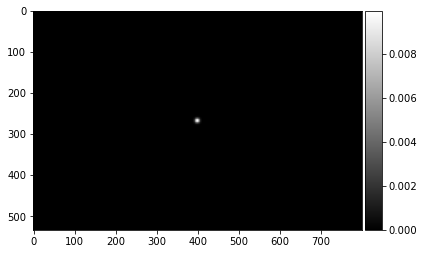

In [43]:
gauss = np.zeros((img.shape[0], img.shape[1]))
row = (img.shape[0] - kernel.shape[0]) // 2
col = (img.shape[1] - kernel.shape[1]) // 2
gauss[row:-(img.shape[0]-row-kernel.shape[0]), col:-(img.shape[1]-col-kernel.shape[1])] = kernel[:,:]
imshow(gauss, cmap='gray')

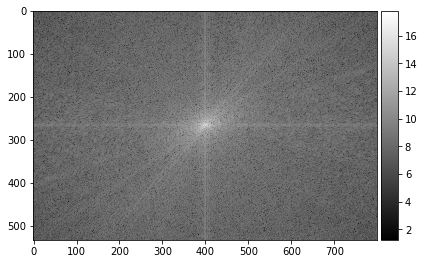

In [44]:
"""freq_img =processed_fourier(img)
shift2center = np.fft.fftshift(fft2)
log_shift2center = np.log(1 + np.abs(shift2center))
log_shift2center = (log_shift2center * 255).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(freq_img, 'gray')"""
freq_img = fp.fft2(img)
processed_freq = np.log(1 + np.abs(fp.fftshift(freq_img)))
imshow(processed_freq, cmap='gray')

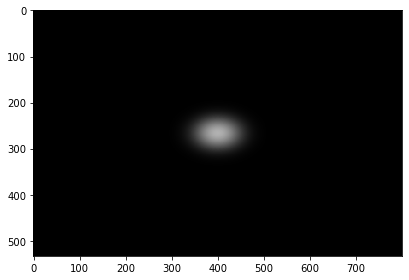

In [45]:
freq_gauss = fp.fft2(fp.ifftshift(gauss))
lg_gauss = np.log(1 + np.abs(fp.fftshift(freq_gauss)))
imshow(lg_gauss, cmap='gray')

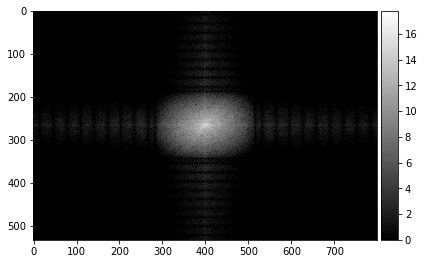

In [46]:
multiple = freq_img * freq_gauss
processed_mult = np.log(1 + np.abs(np.fft.fftshift(multiple)))
imshow(processed_mult, cmap='gray')

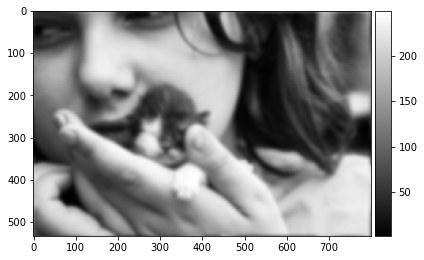

In [47]:
out_img = fp.ifft2(multiple).real
imshow(out_img, cmap='gray')

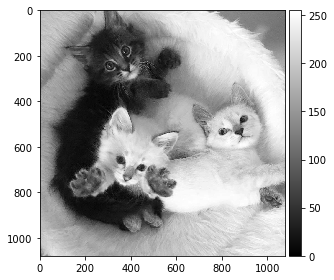

In [48]:
img = imread('2.jpg')
img = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2]
imshow(img, cmap='gray')

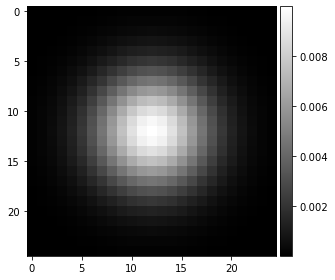

In [49]:
sigma = 4
n_points = 2 * round(sigma * 3) + 1
kernel = np.outer(gaussian(n_points, std=sigma), gaussian(n_points, std=sigma))
kernel = kernel / kernel.sum()
imshow(kernel, cmap='gray')

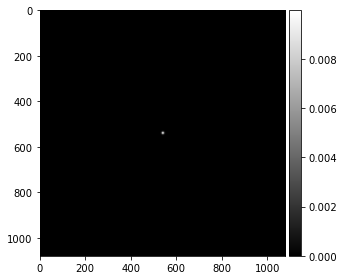

In [50]:
gauss = np.zeros((img.shape[0], img.shape[1]))
row = (img.shape[0] - kernel.shape[0]) // 2
col = (img.shape[1] - kernel.shape[1]) // 2
gauss[row:-(img.shape[0]-row-kernel.shape[0]), col:-(img.shape[1]-col-kernel.shape[1])] = kernel[:,:]
imshow(gauss, cmap='gray')

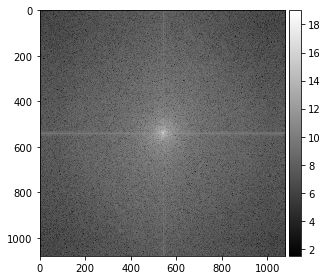

In [51]:
freq_img = fp.fft2(img)
processed_freq = np.log(1 + np.abs(fp.fftshift(freq_img)))
imshow(processed_freq, cmap='gray')

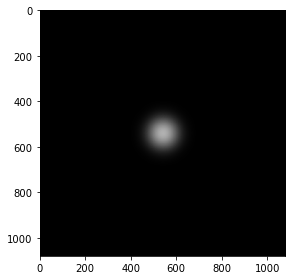

In [52]:
freq_gauss = fp.fft2(fp.ifftshift(gauss))
lg_gauss = np.log(1 + np.abs(fp.fftshift(freq_gauss)))
imshow(lg_gauss, cmap='gray')

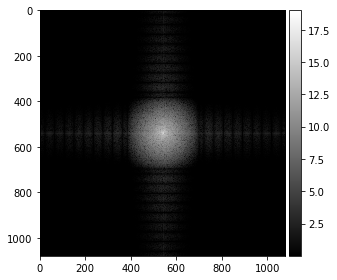

In [53]:
multiple = freq_img * freq_gauss
processed_mult = np.log(1 + np.abs(np.fft.fftshift(multiple)))
imshow(processed_mult, cmap='gray')

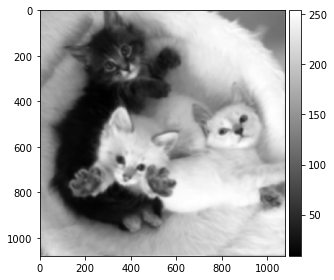

In [54]:
out_img = fp.ifft2(multiple).real
imshow(out_img, cmap='gray')

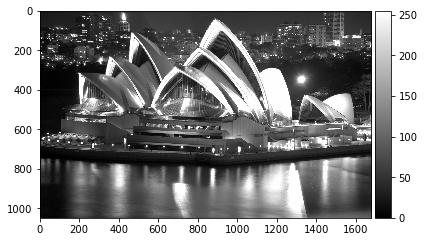

In [55]:
img = imread('1.jpg')
img = 0.2126 * img[:,:,0] + 0.7152 * img[:,:,1] + 0.0722 * img[:,:,2]
imshow(img, cmap='gray')

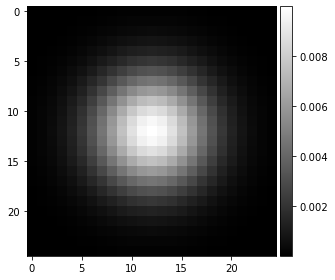

In [56]:
sigma = 4
n_points = 2 * round(sigma * 3) + 1
kernel = np.outer(gaussian(n_points, std=sigma), gaussian(n_points, std=sigma))
kernel = kernel / kernel.sum()
imshow(kernel, cmap='gray')

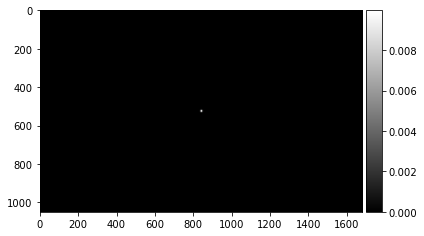

In [57]:
gauss = np.zeros((img.shape[0], img.shape[1]))
row = (img.shape[0] - kernel.shape[0]) // 2
col = (img.shape[1] - kernel.shape[1]) // 2
gauss[row:-(img.shape[0]-row-kernel.shape[0]), col:-(img.shape[1]-col-kernel.shape[1])] = kernel[:,:]
imshow(gauss, cmap='gray')

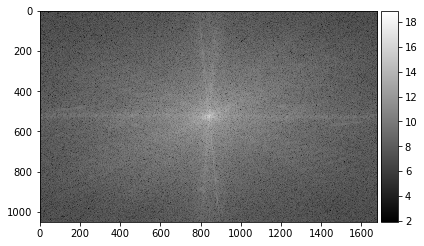

In [58]:
freq_img = fp.fft2(img)
processed_freq = np.log(1 + np.abs(fp.fftshift(freq_img)))
imshow(processed_freq, cmap='gray')

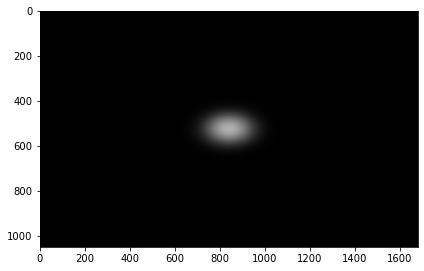

In [59]:
freq_gauss = fp.fft2(fp.ifftshift(gauss))
lg_gauss = np.log(1 + np.abs(fp.fftshift(freq_gauss)))
imshow(lg_gauss, cmap='gray')

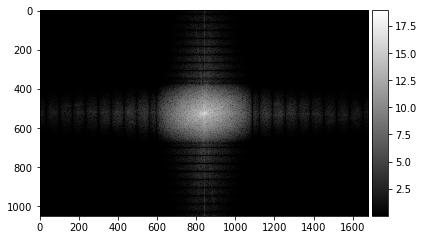

In [60]:
multiple = freq_img * freq_gauss
processed_mult = np.log(1 + np.abs(np.fft.fftshift(multiple)))
imshow(processed_mult, cmap='gray')

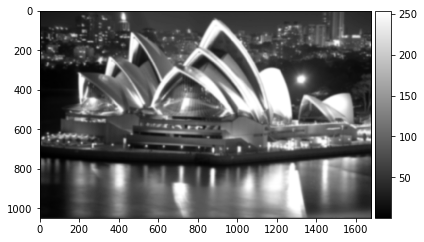

In [61]:
out_img = fp.ifft2(multiple).real
imshow(out_img, cmap='gray')